# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import math
from scipy.optimize import minimize

# Functions

In [2]:
def model(t, k_a, k_e):
    return 200 * k_a / (k_a - k_e) * (math.exp(-k_e*t) - math.exp(-k_a*t))

def objective_function(params):
    t = [1, 2, 5, 7, 12, 24]
    measurements = [48.52, 70.61, 82.57, 72.87, 34.09, 7.37]
    sigmas = [4, 4, 16, 4, 1, 4]
    k_a, k_e = params
    
    sum_of_squares = sum((1 / s * (m - model(t, k_a, k_e)))**2 for t, m, s in zip(t, measurements, sigmas))
    
    return np.sqrt(sum_of_squares)

# Task 1a and 1b

Results of minimizer:  [0.30390622 0.21379046]


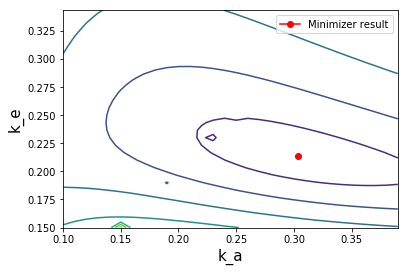

In [3]:
k_a = np.arange(0.1, 0.4, (0.4 - 0.1) / 30)
k_e = np.arange(0.15, 0.35, (0.35 - 0.15) / 30)

X, Y = np.meshgrid(k_a, k_e)
Z = np.array([[objective_function([a,e]) for a in k_a] for e in k_e])

# Minimizer
x0 = [0.15, 0.3]
results = minimize(objective_function, x0,  method='Nelder-Mead', tol=1e-6)
print("Results of minimizer: ", results.x)

plt.contour(X, Y, Z)
plt.plot(results.x[0], results.x[1], marker='o', color='r', label='Minimizer result')
plt.xlabel('k_a', size='15')
plt.ylabel('k_e', size='15')
plt.legend()
plt.show()